In [1]:
import gym
import gym_cube
import numpy as np

/home/yoosoo/anaconda3/envs/mujoco/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


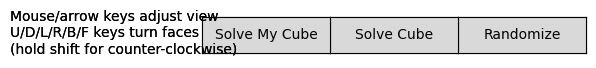

In [2]:
# e = gym.make('env_name')
e = gym.make('cube-v0') 

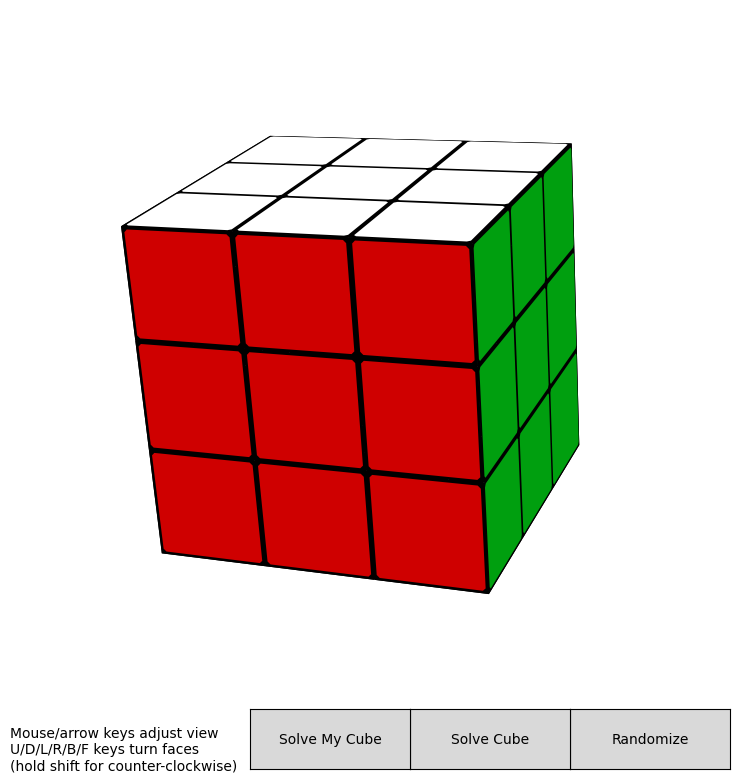

In [3]:
# render the image
e.render()

In [4]:
# action set
# UDFBRLU'D'F'B'R'L'
# 01234567891011

action = np.random.randint(12)
action_dict = {0: "U", 1: "D", 2: "F", 3: "B", 4: "R", 5: "L", 6: "U'", 7: "D'", 8: "F'", 9:"B'", 10:"R'", 11: "L'"}
print(action_dict[action])

U


In [5]:
# e.step(action)
# if the cube is solved, done -> 1, reward -> 1 else done -> 0, reward -> -1
next_state, reward, done, info = e.step(action)
print("Reward: ", reward)
print("Done: ", done)

Reward:  0
Done:  -1


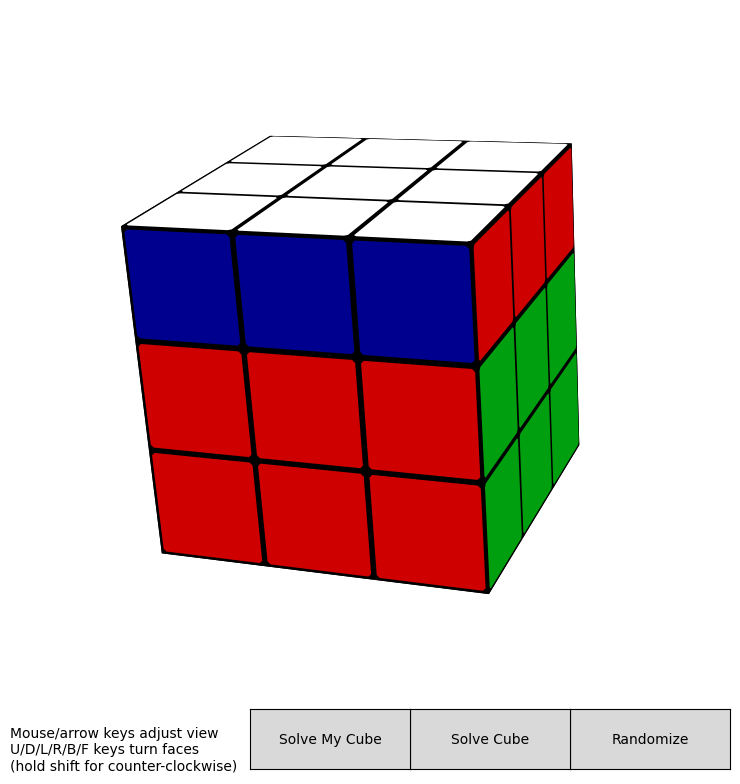

In [6]:
e.render()

In [7]:
if action < 6:
    reverse  = action + 6
else:
    reverse = action -6
print(reverse)
next_state, reward, done, info = e.step(reverse)
print("Reward: ", reward)
print("Done: ", done)

6
Reward:  1
Done:  1


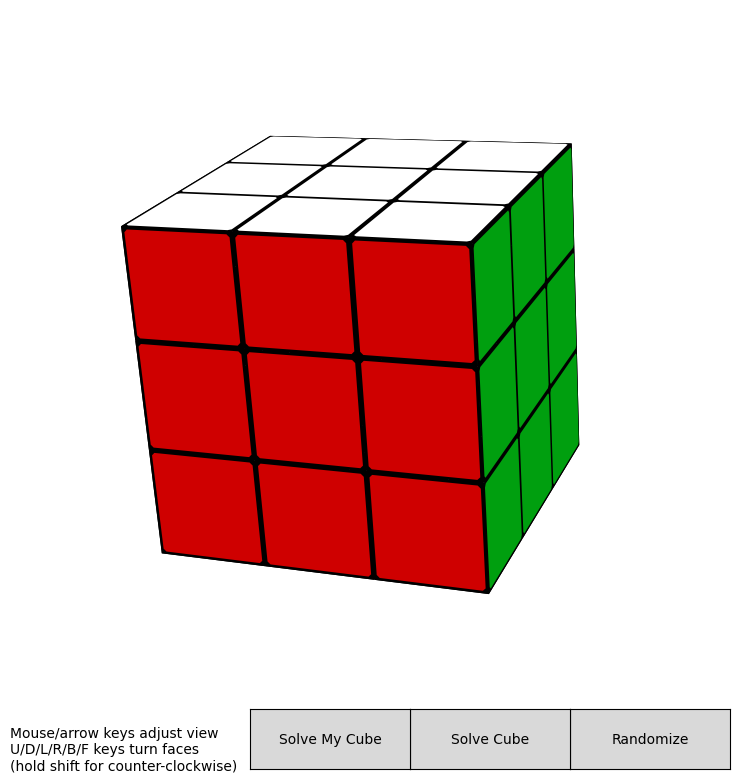

In [8]:
e.initialize()
e.render()

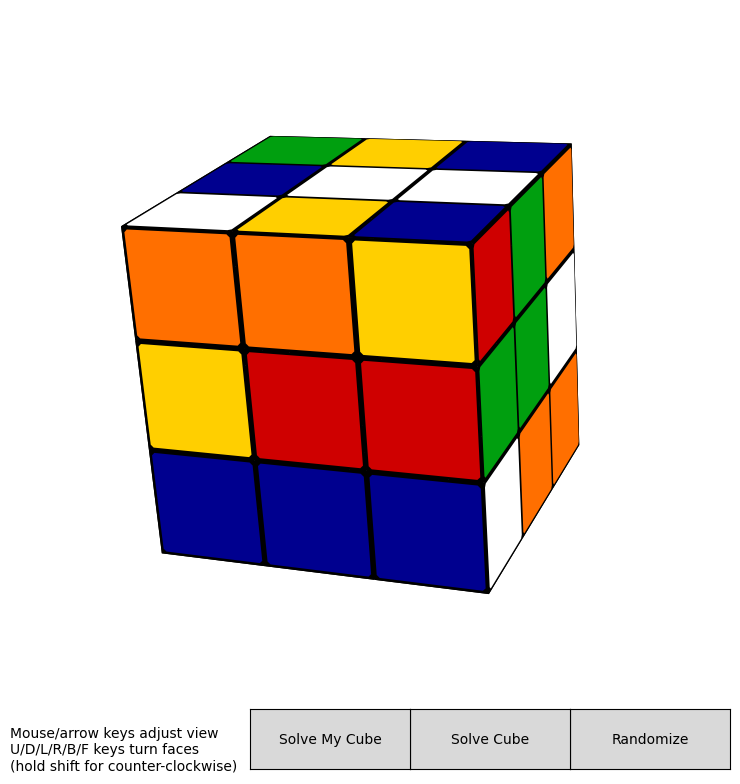

In [9]:
# reset means scrambled state
state = e.reset(scramble_count=10)
e.render()

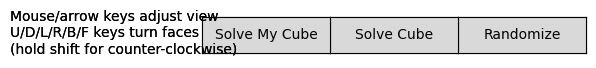

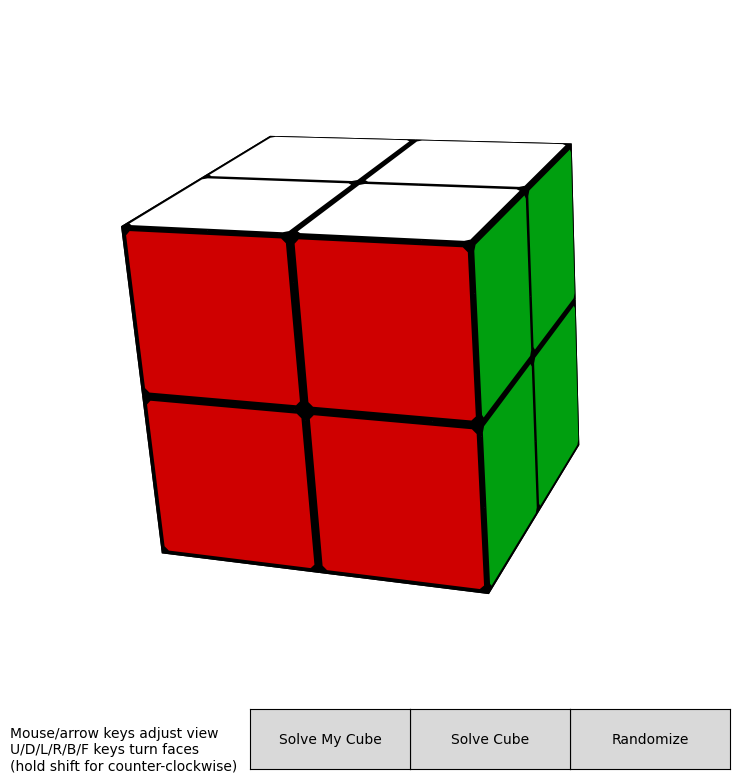

In [10]:
e = gym.make('cube-v0', cube_size = 2) 
e.render()

Reward:  0
Done:  -1


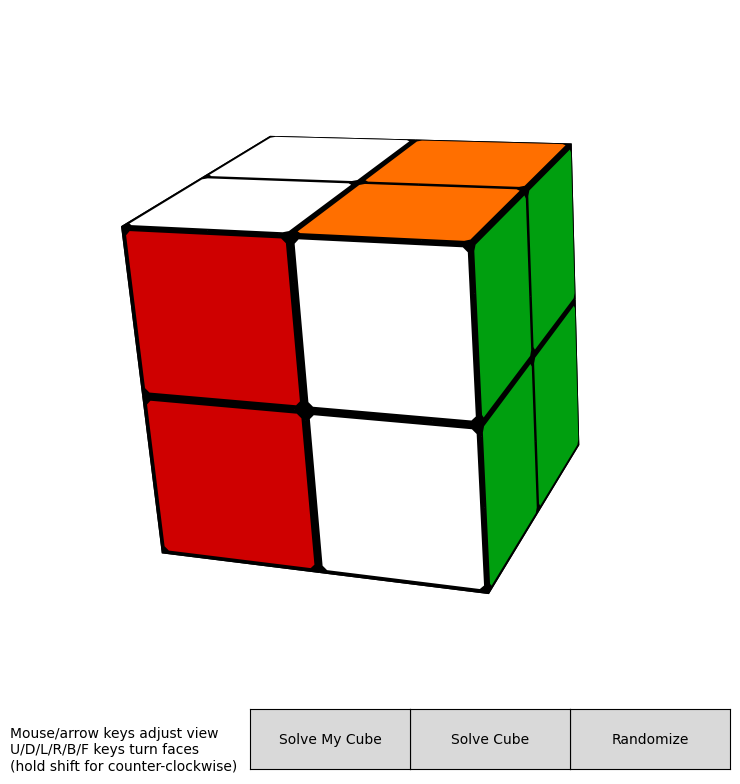

In [11]:
action = np.random.randint(12)
next_state, reward, done, info = e.step(action)
print("Reward: ", reward)
print("Done: ", done)
e.render()

10
Reward:  1
Done:  1


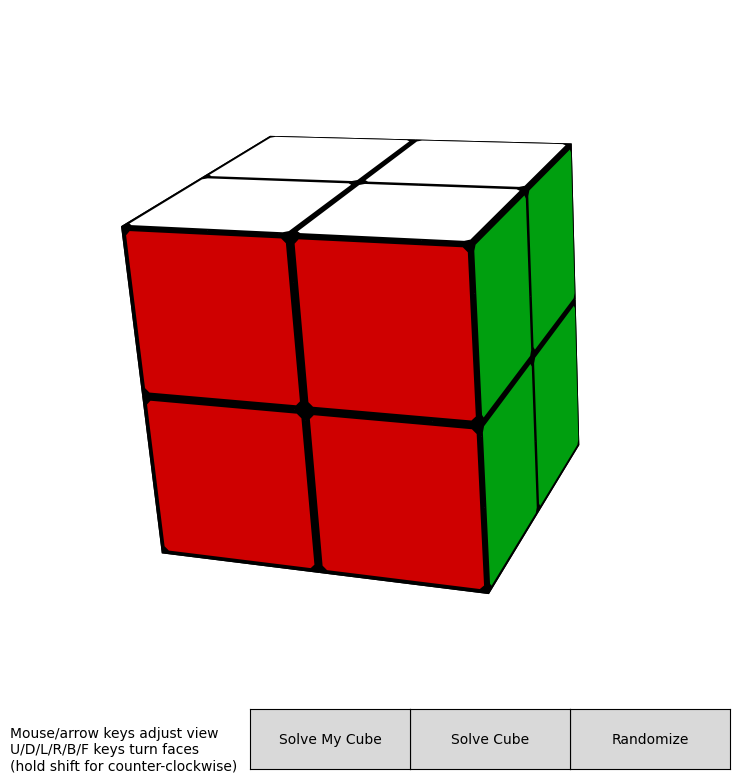

In [12]:
if action < 6:
    reverse  = action + 6
else:
    reverse = action -6
print(reverse)
next_state, reward, done, info = e.step(reverse)
print("Reward: ", reward)
print("Done: ", done)
e.render()

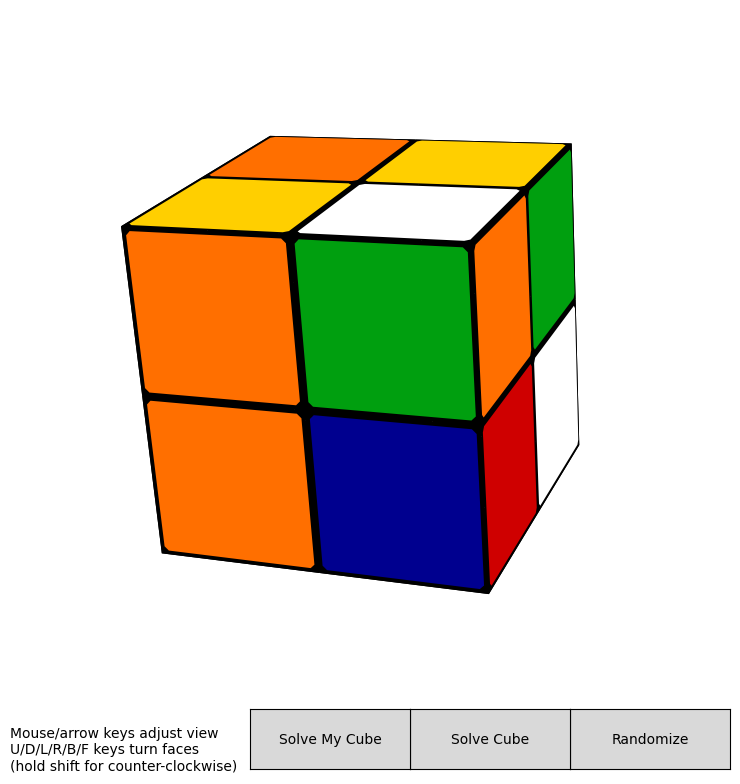

In [13]:
state = e.reset(scramble_count=10)
e.render()

In [14]:
# from gym.wrappers.monitoring.video_recorder import VideoRecorder

In [15]:
import torch

In [16]:
# import plotly.express as px

In [17]:
import matplotlib.animation as animation

In [18]:
import matplotlib.pyplot as plt

In [19]:
from utils import save_frames_as_gif

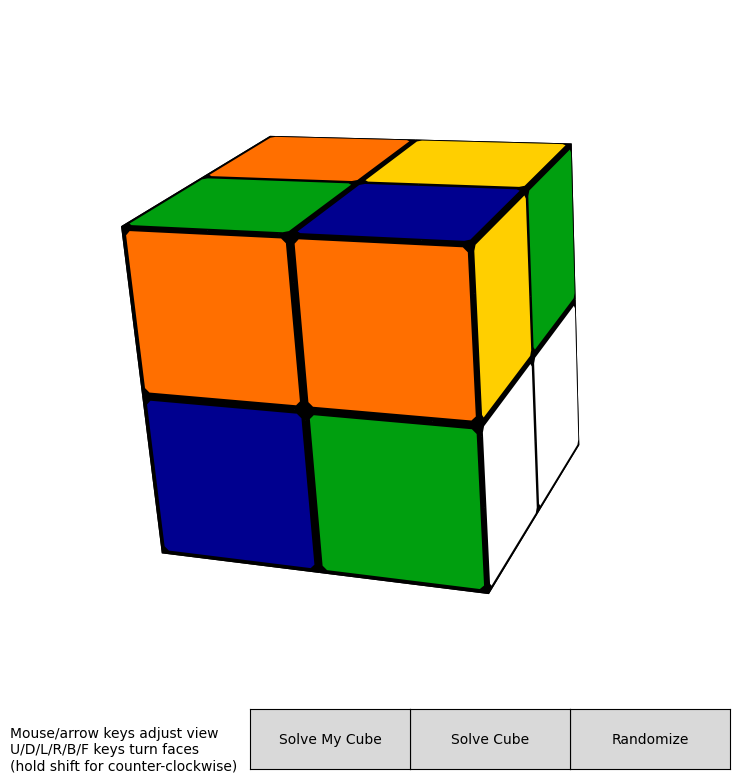

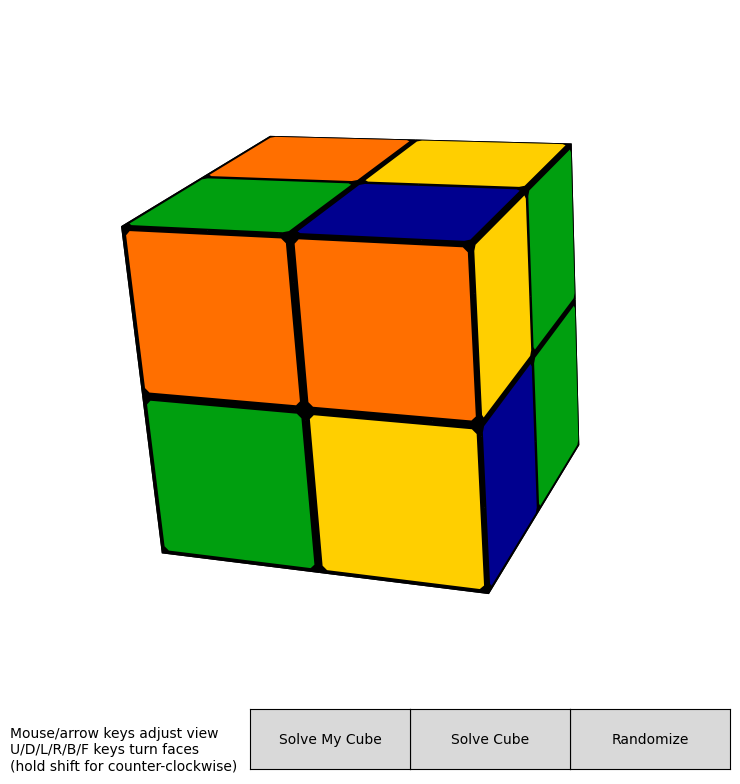

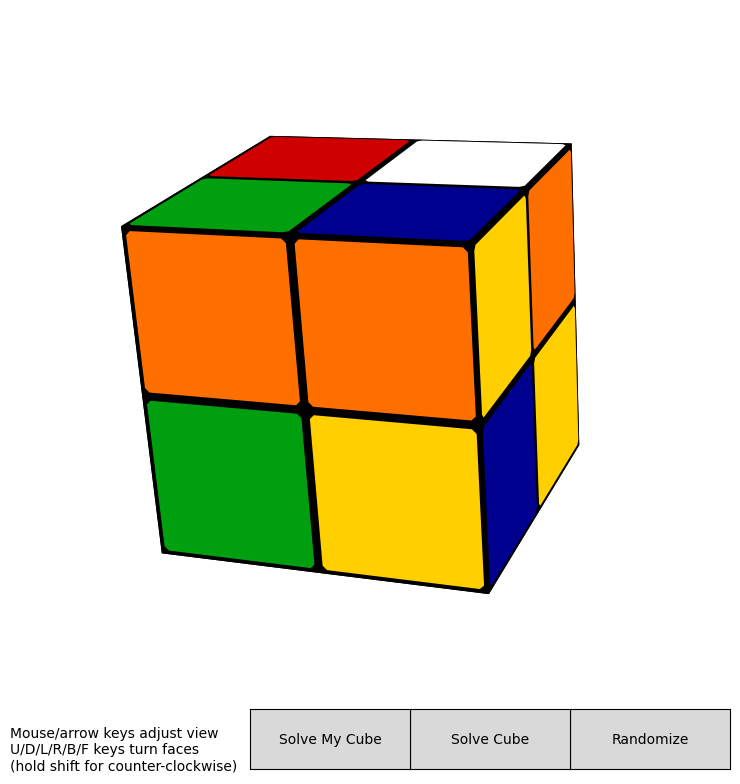

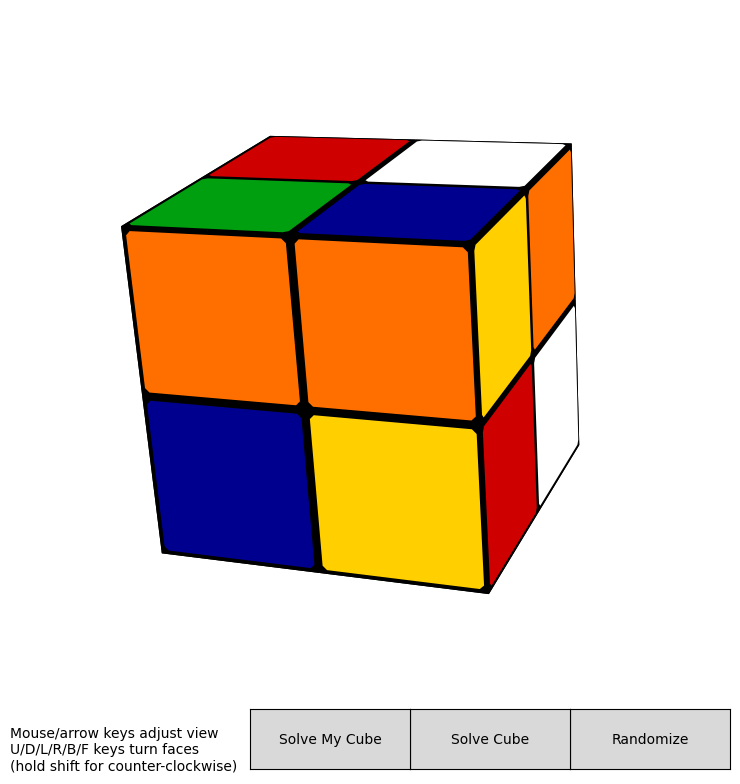

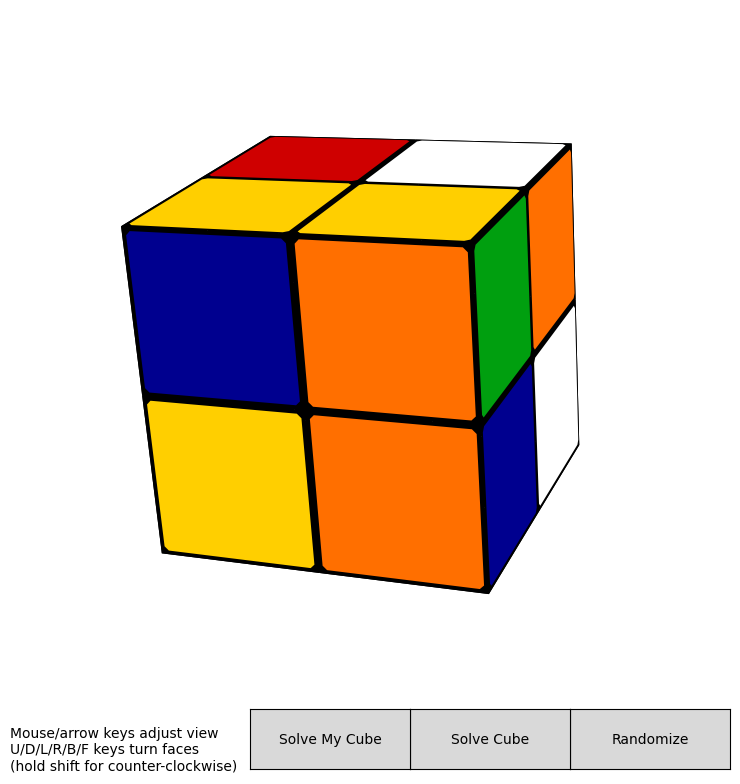

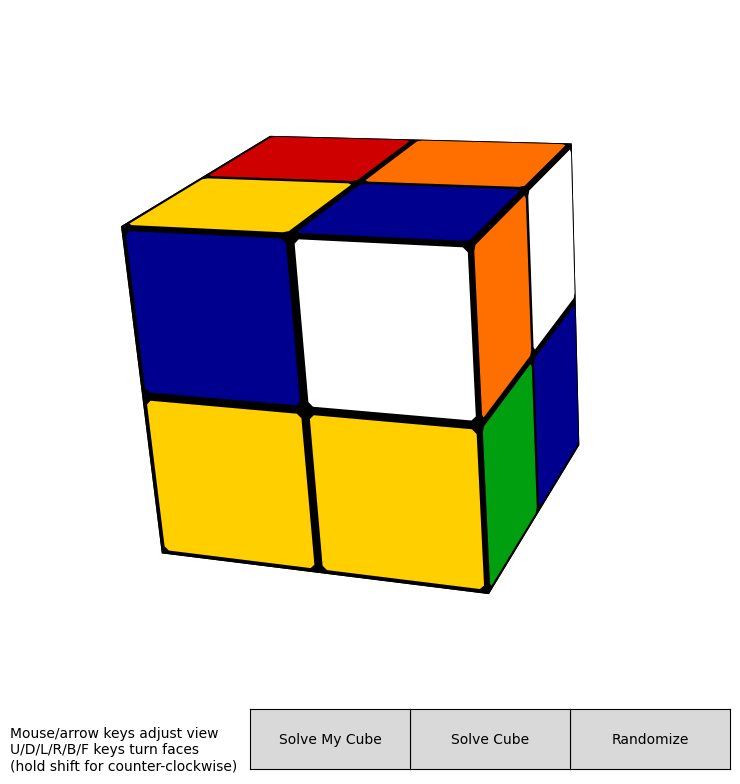

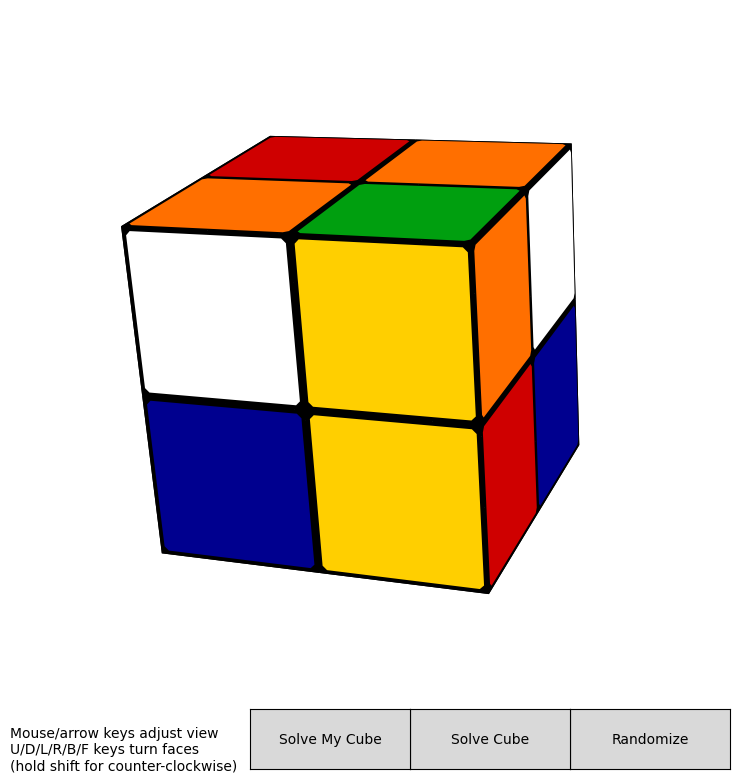

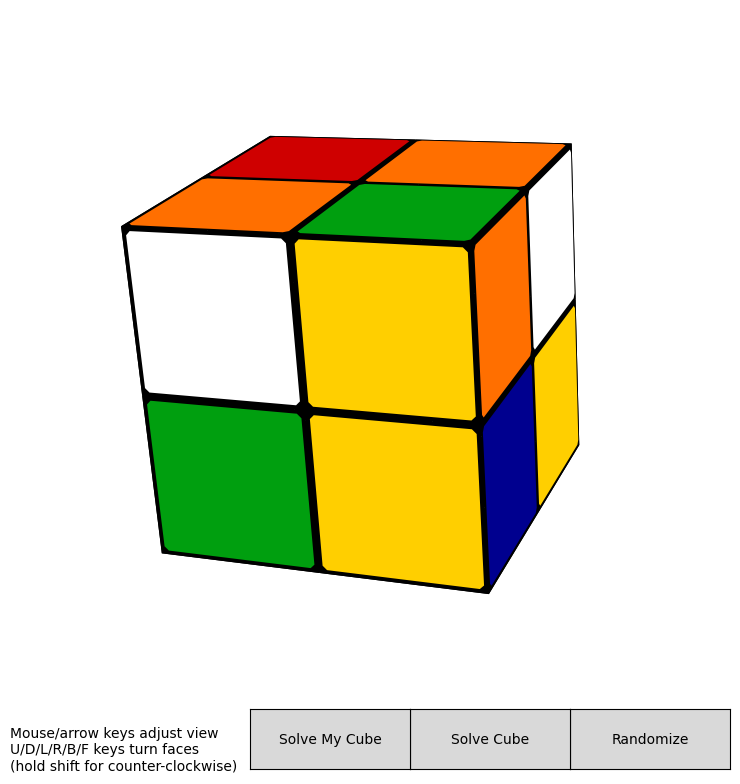

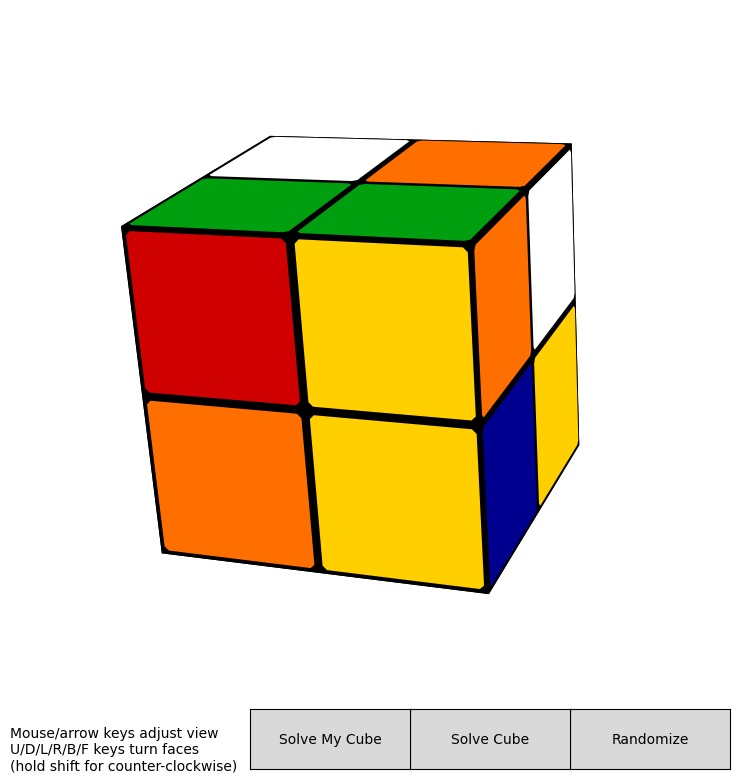

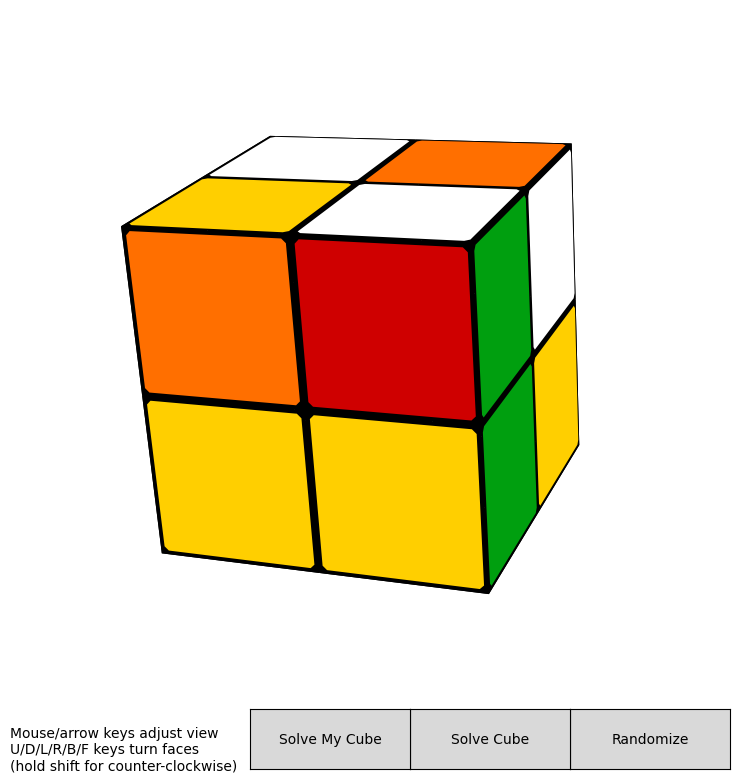

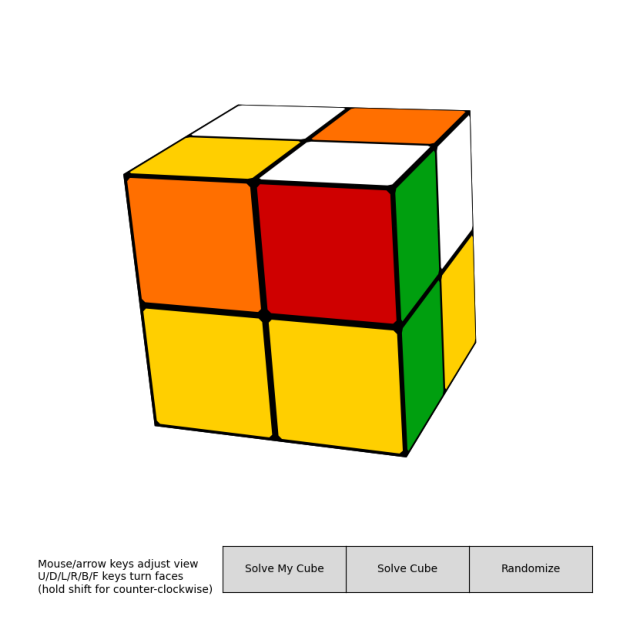

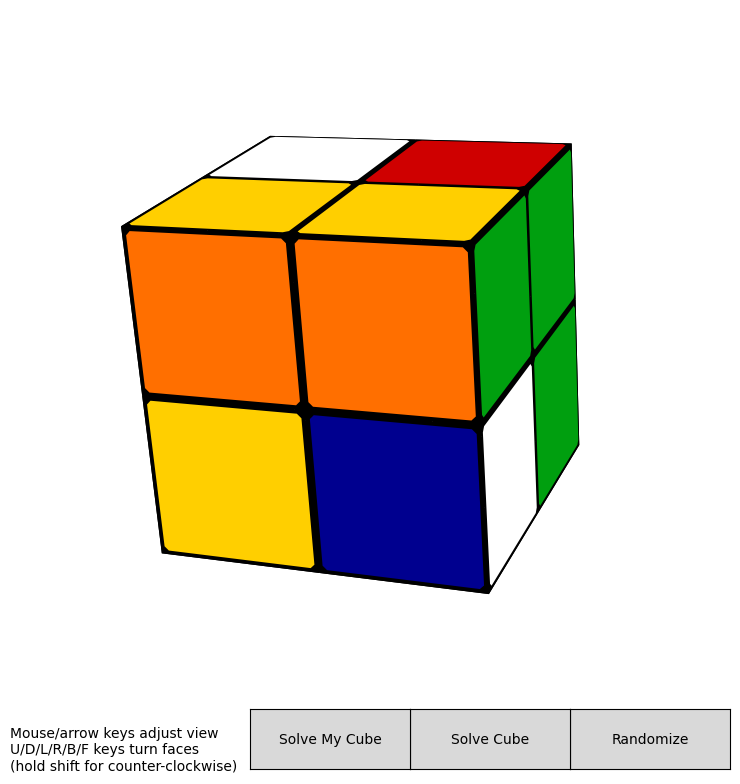

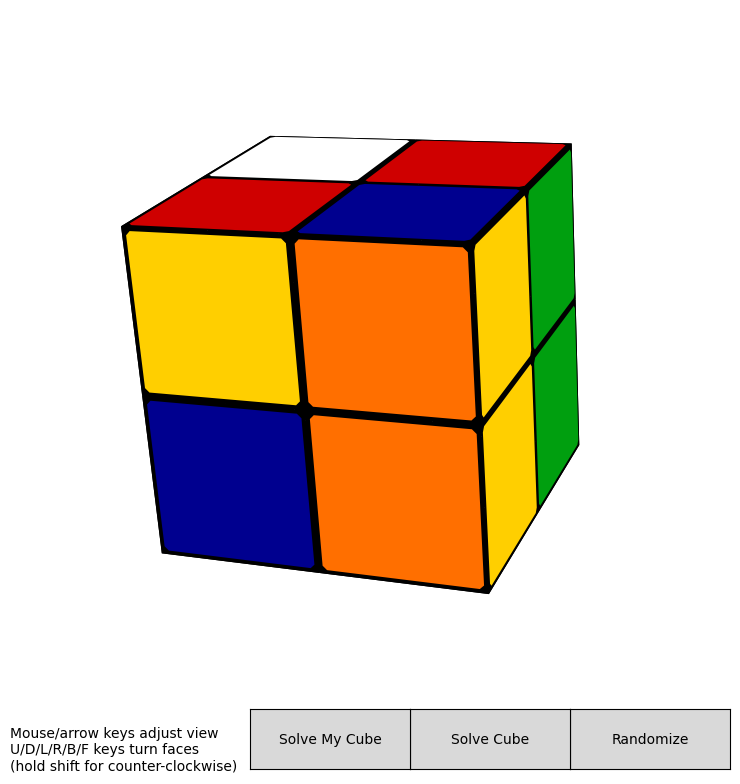

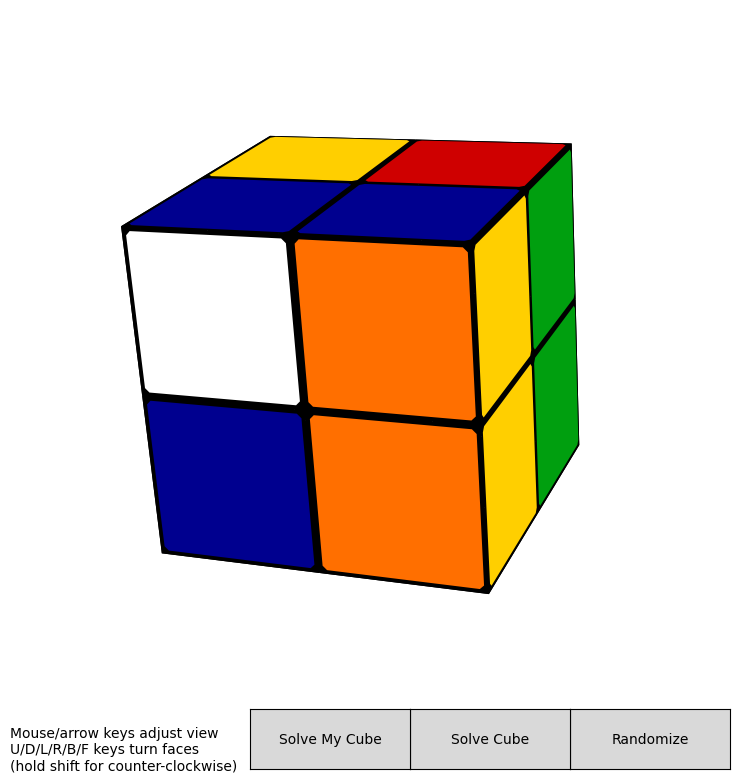

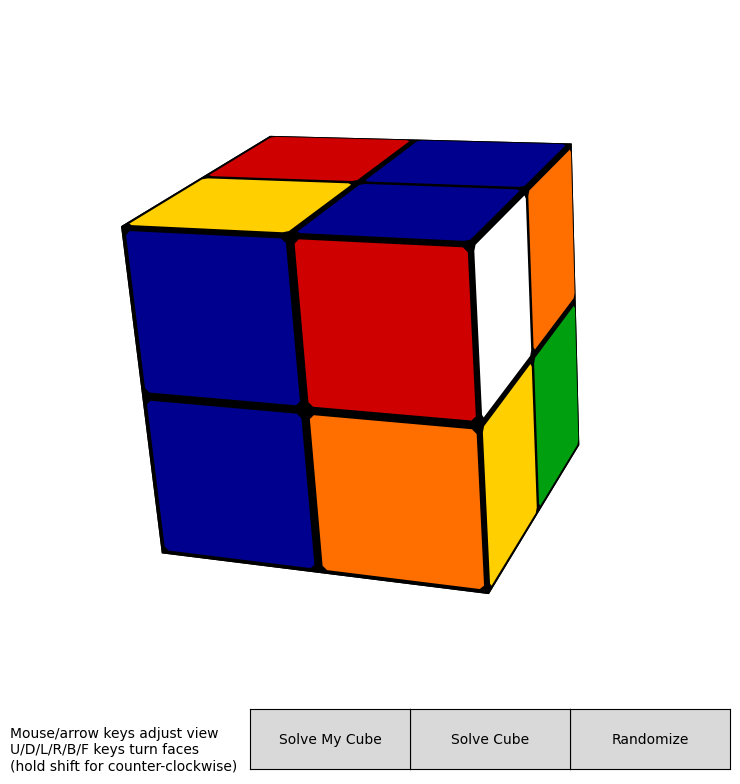

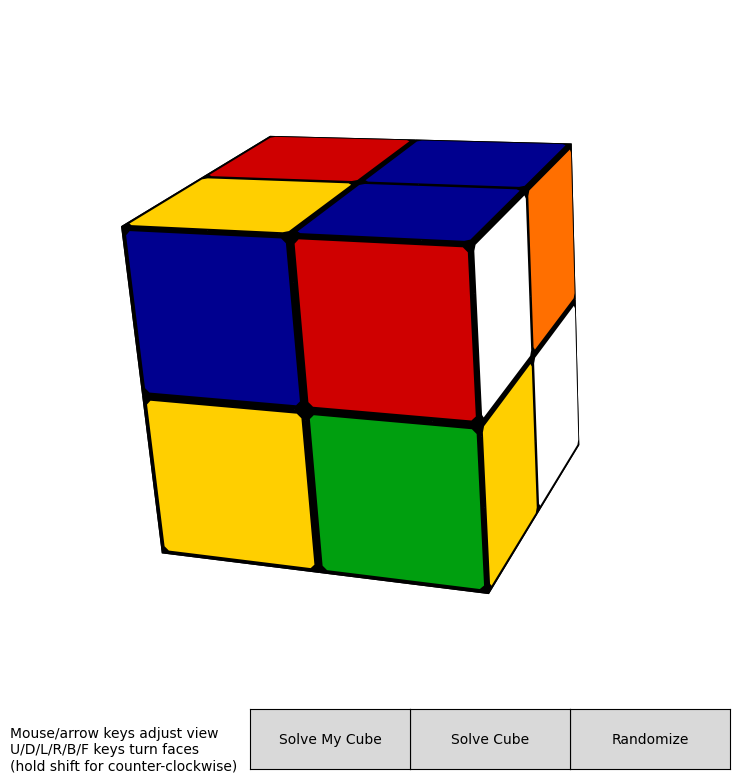

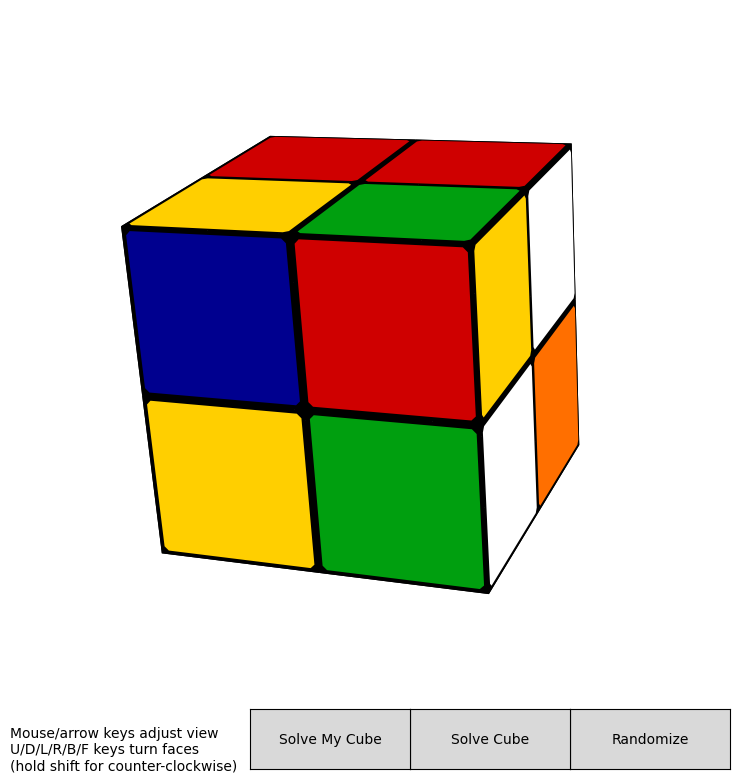

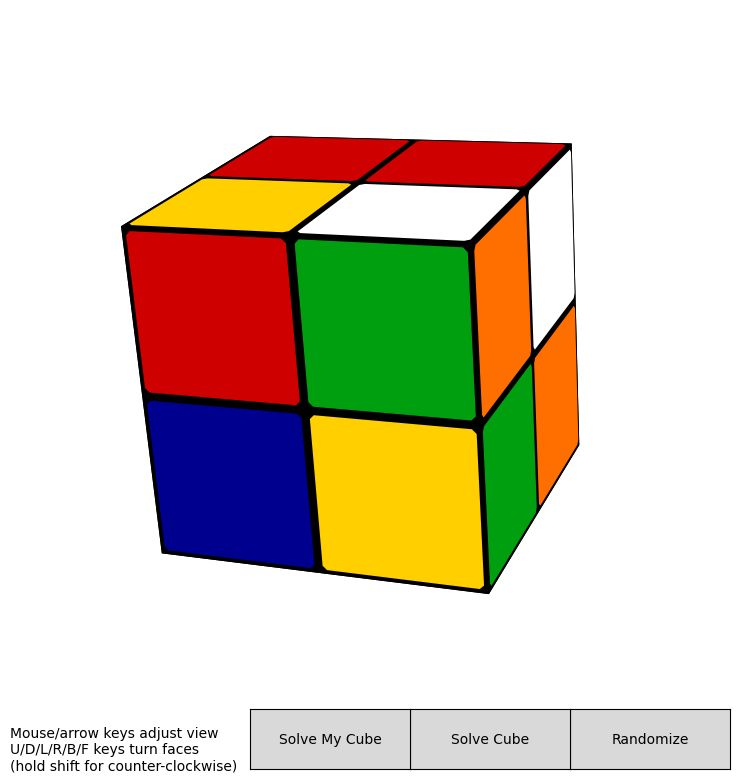

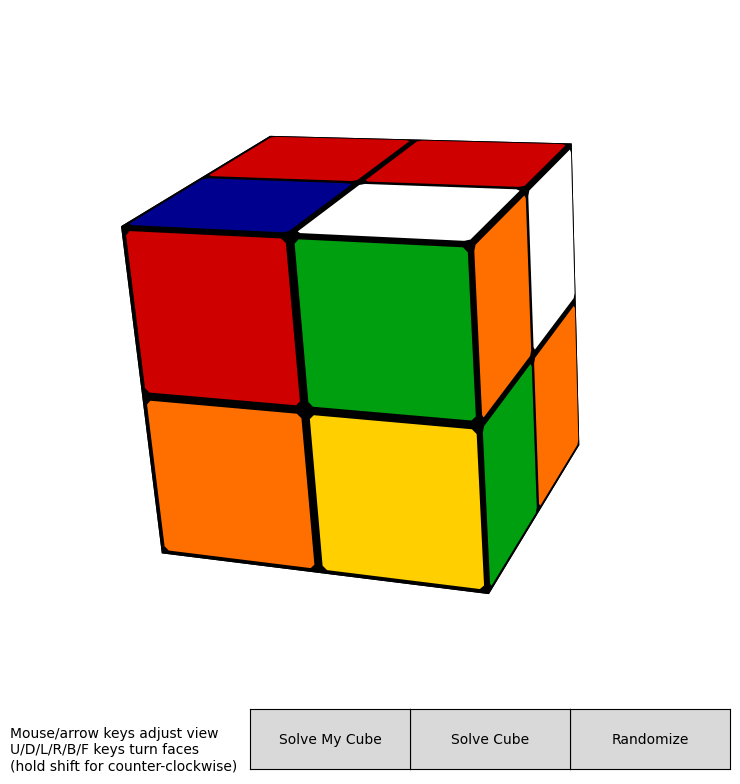

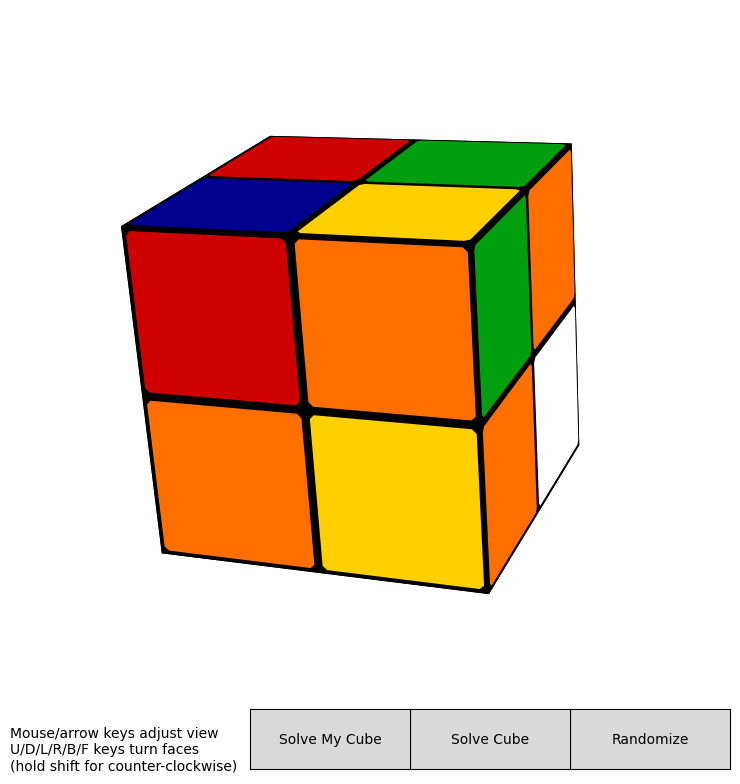

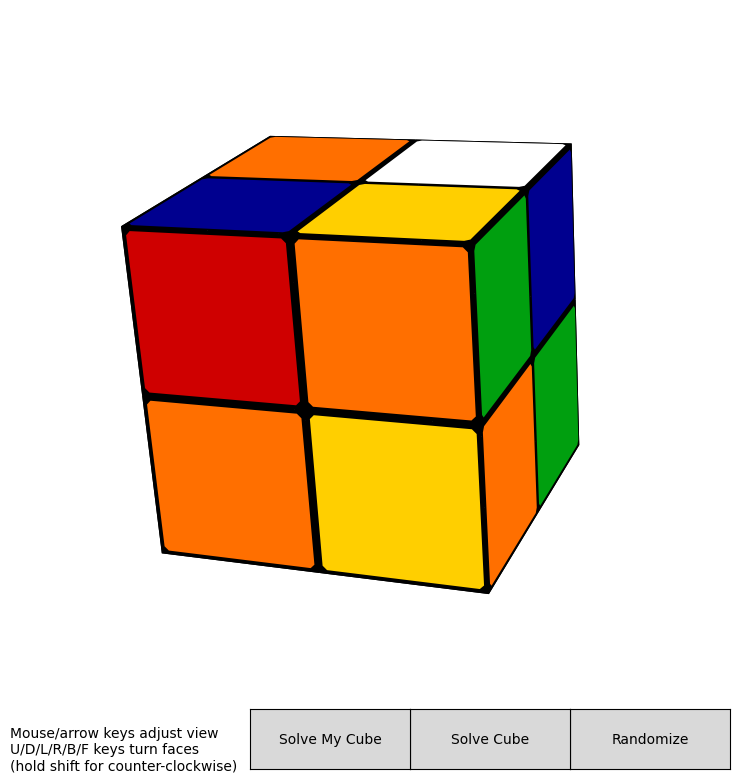

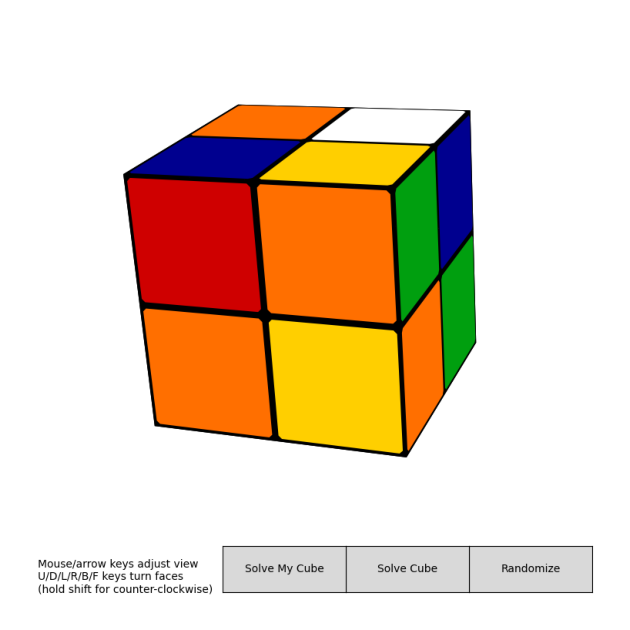

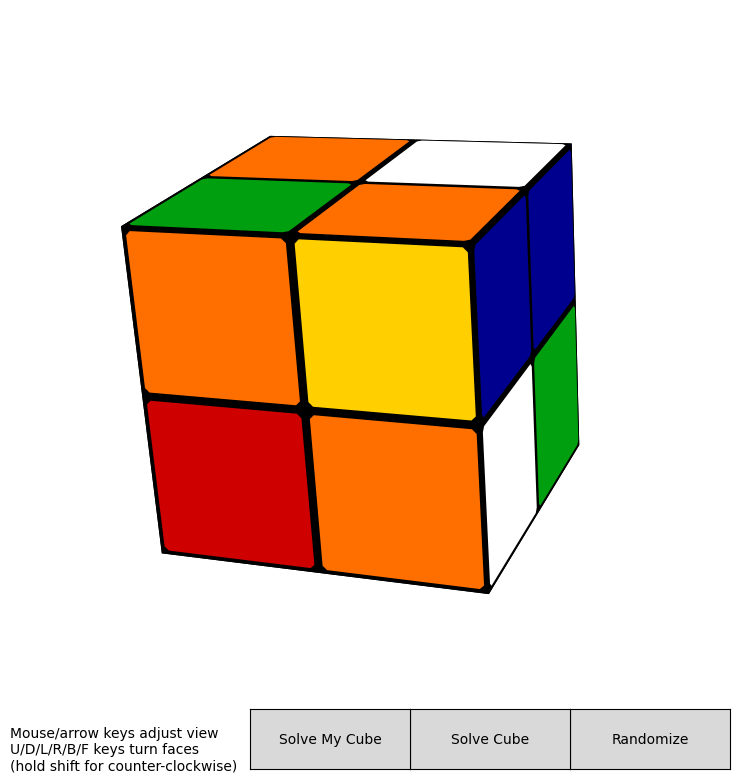

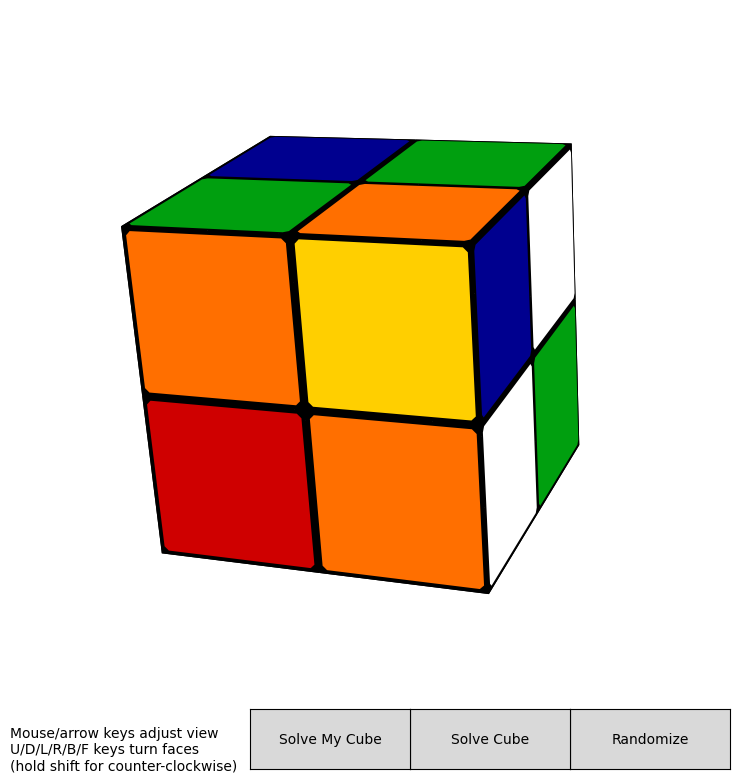

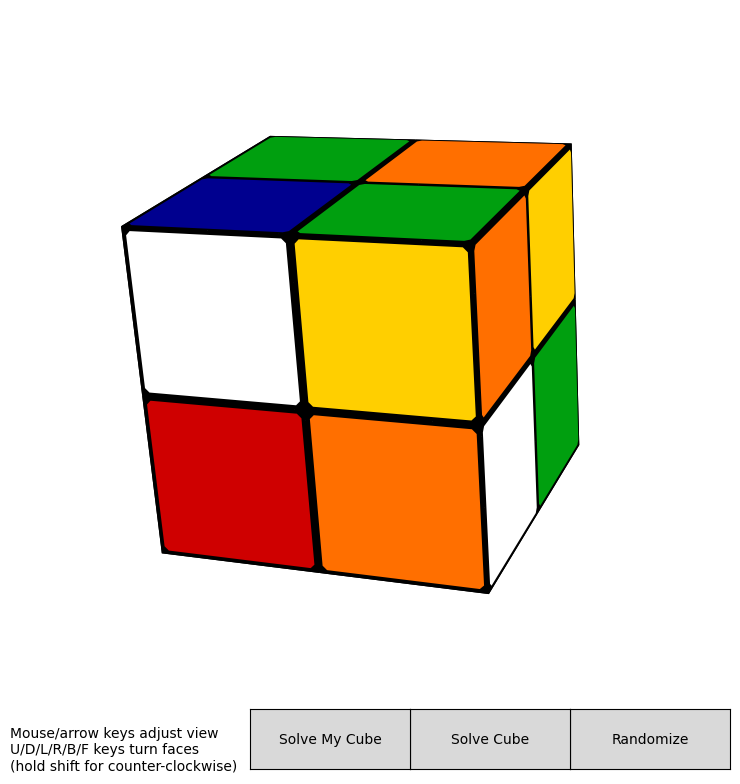

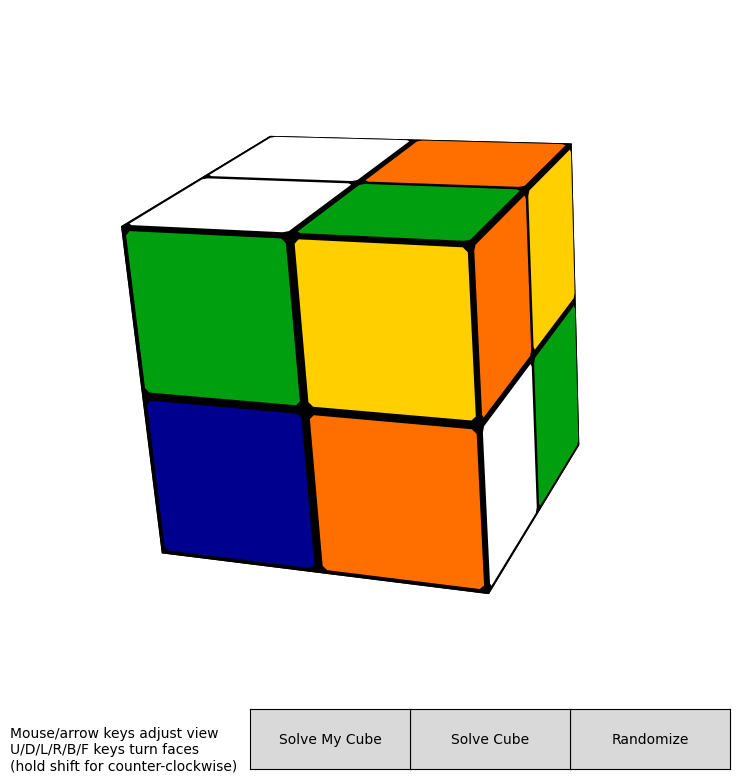

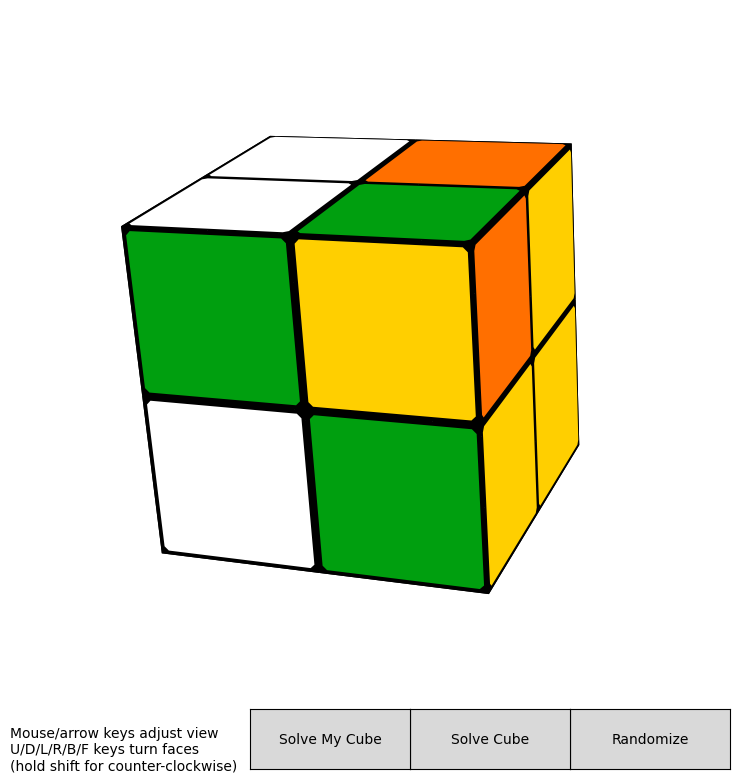

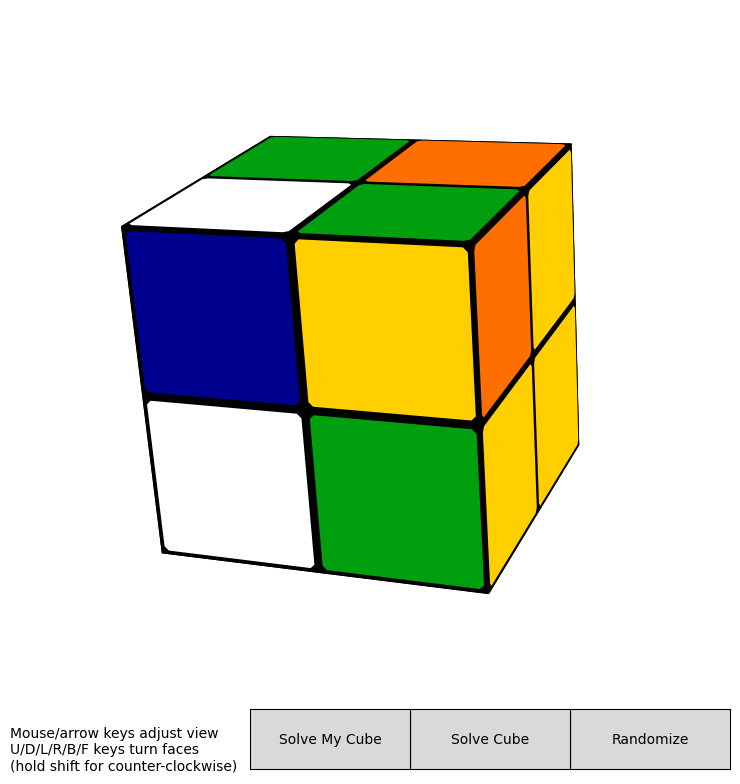

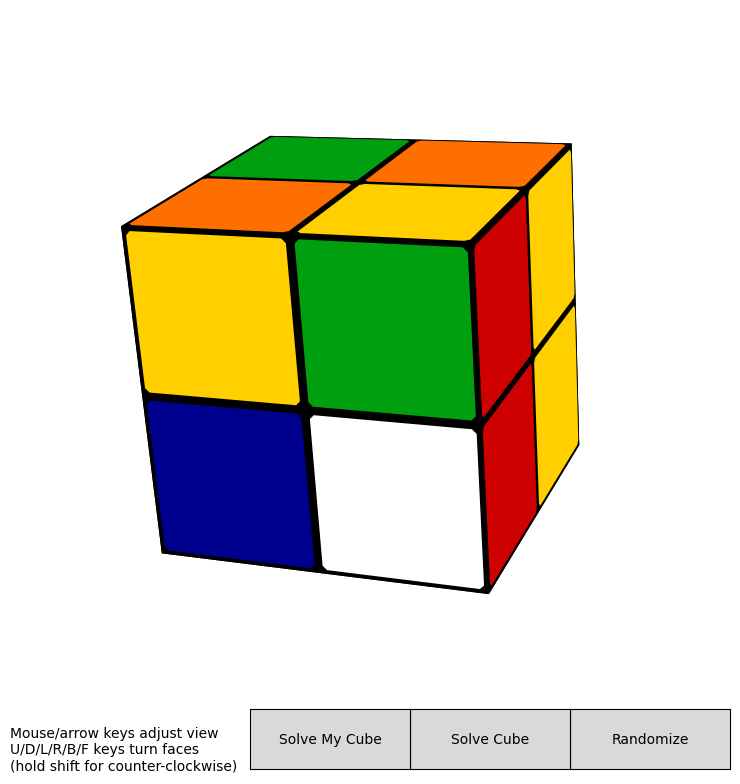

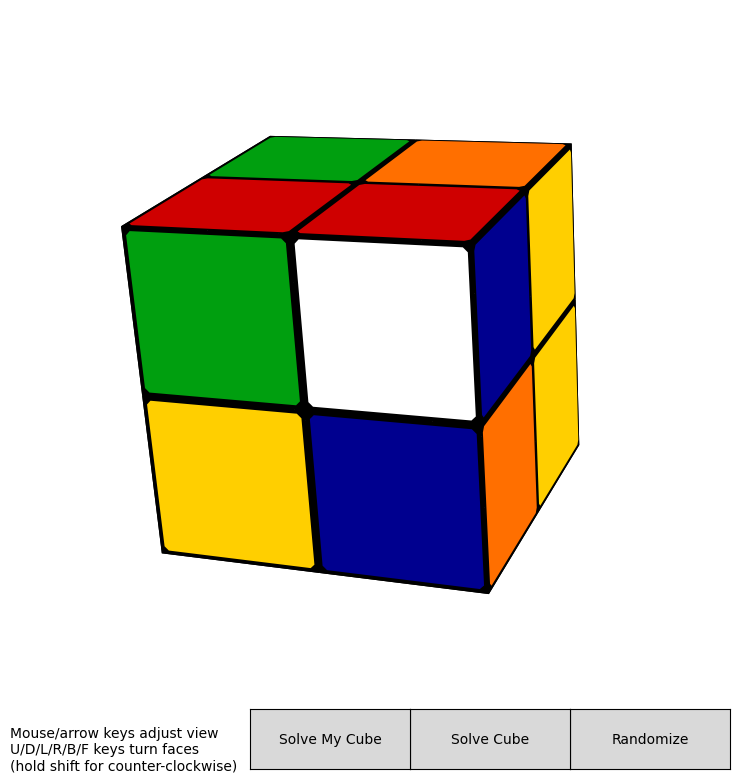

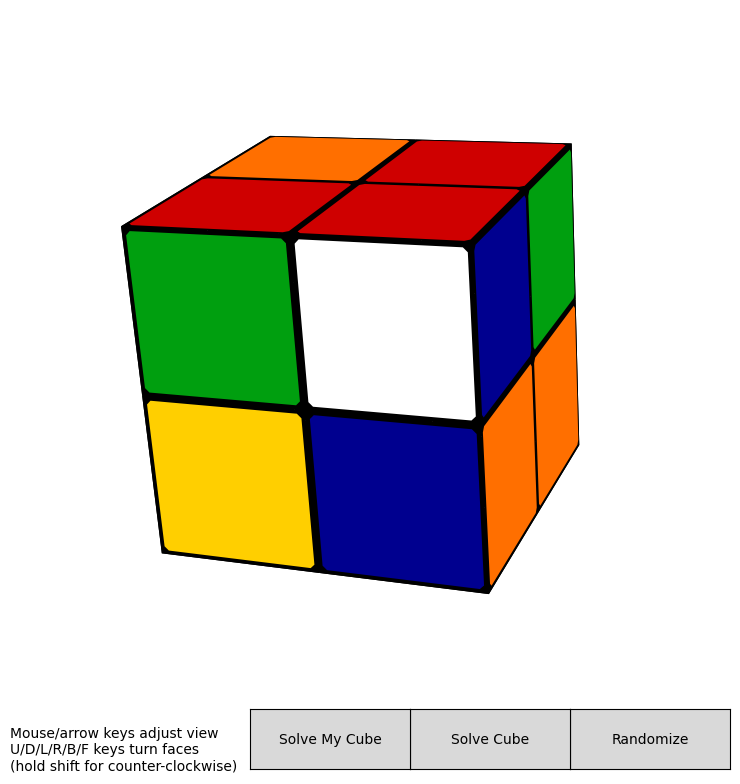

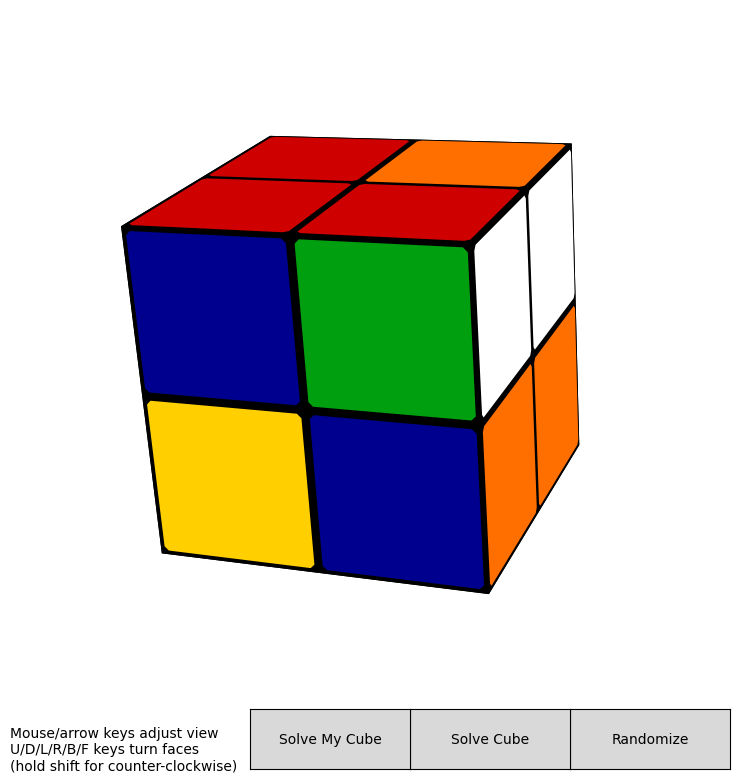

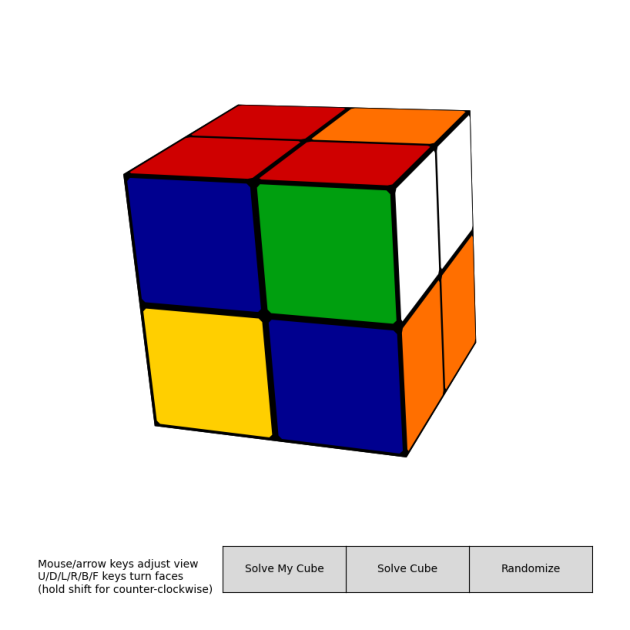

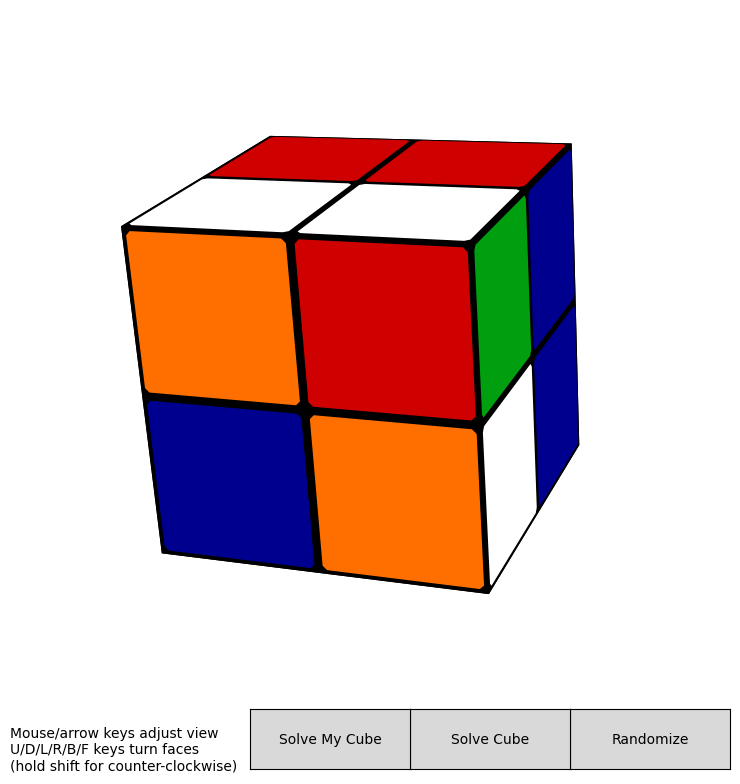

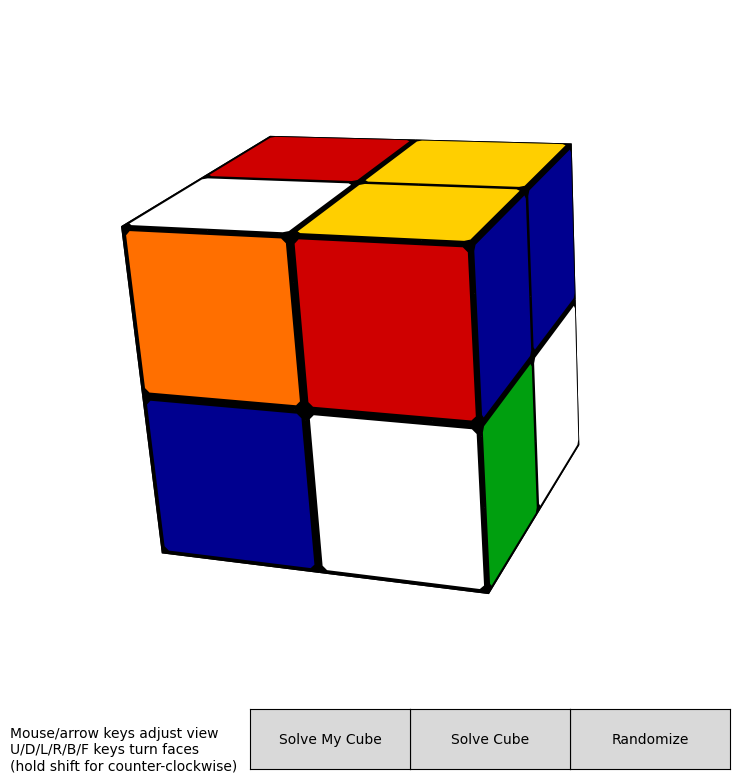

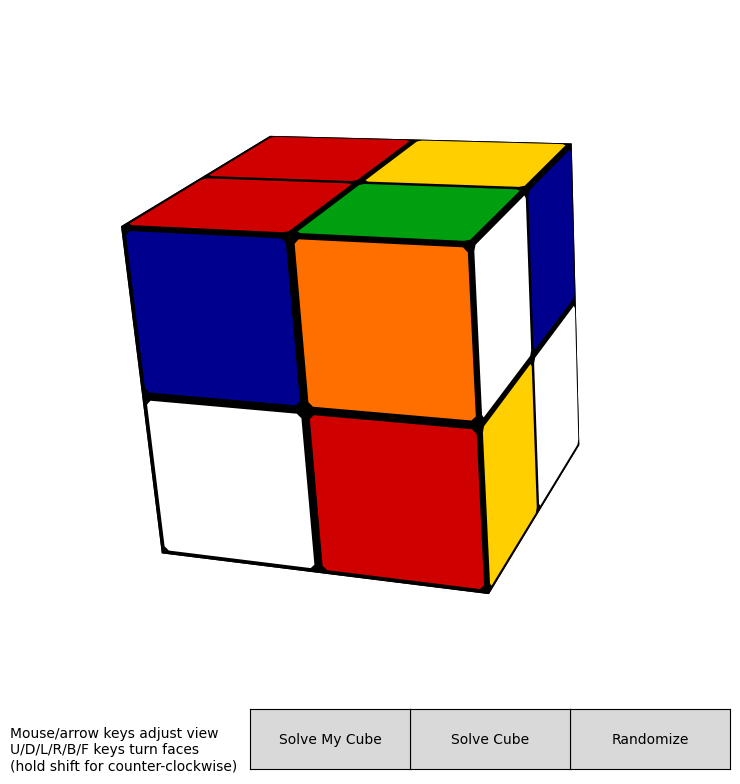

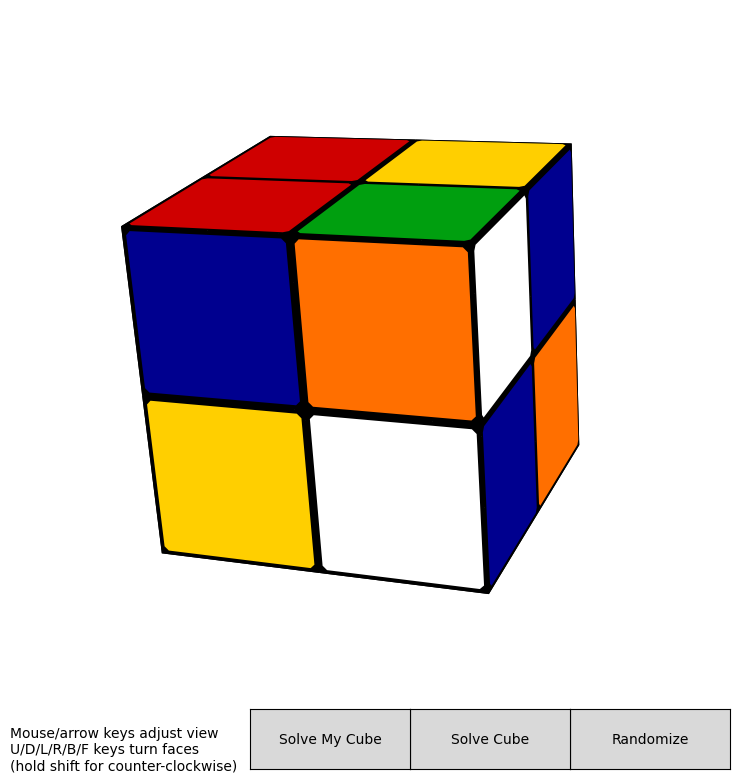

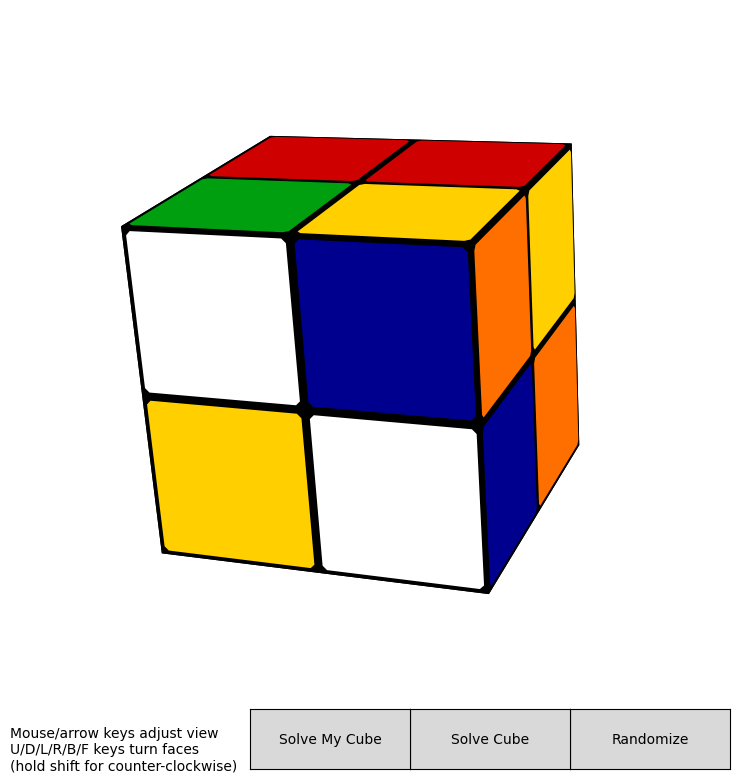

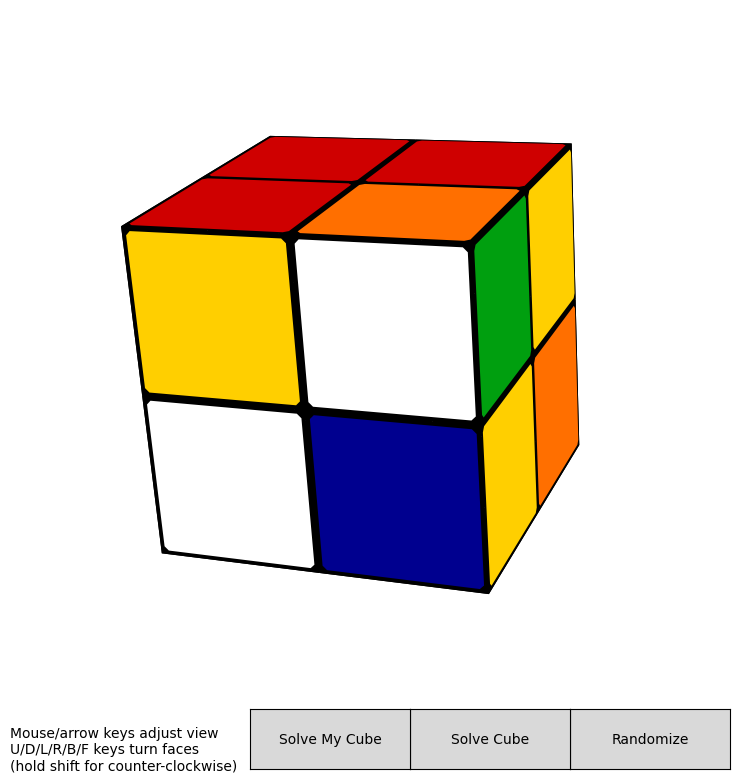

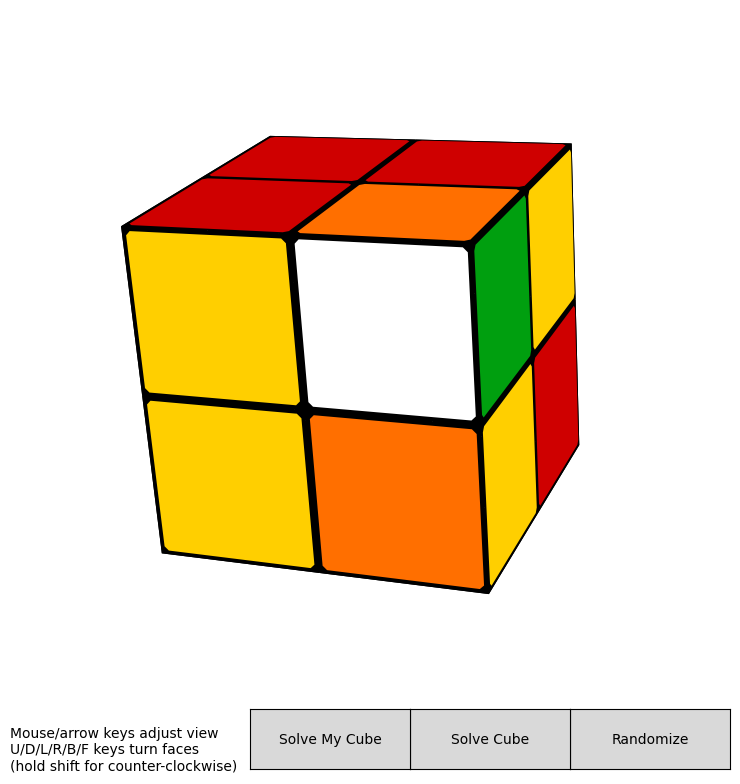

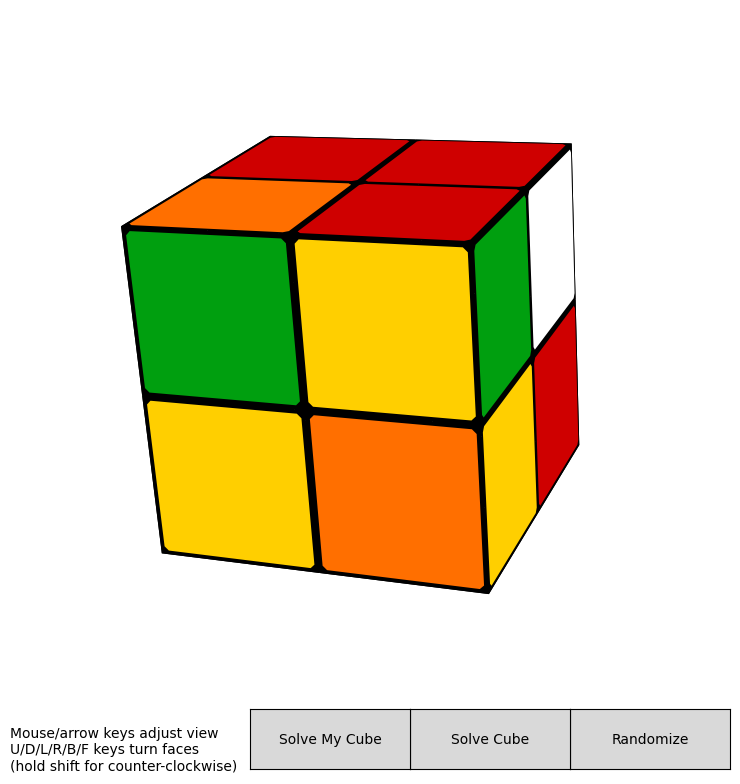

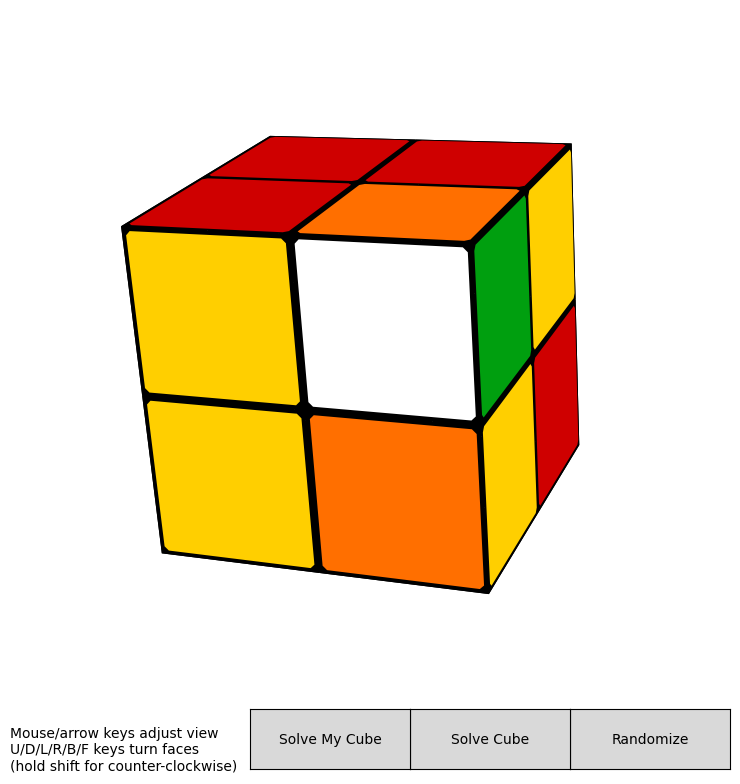

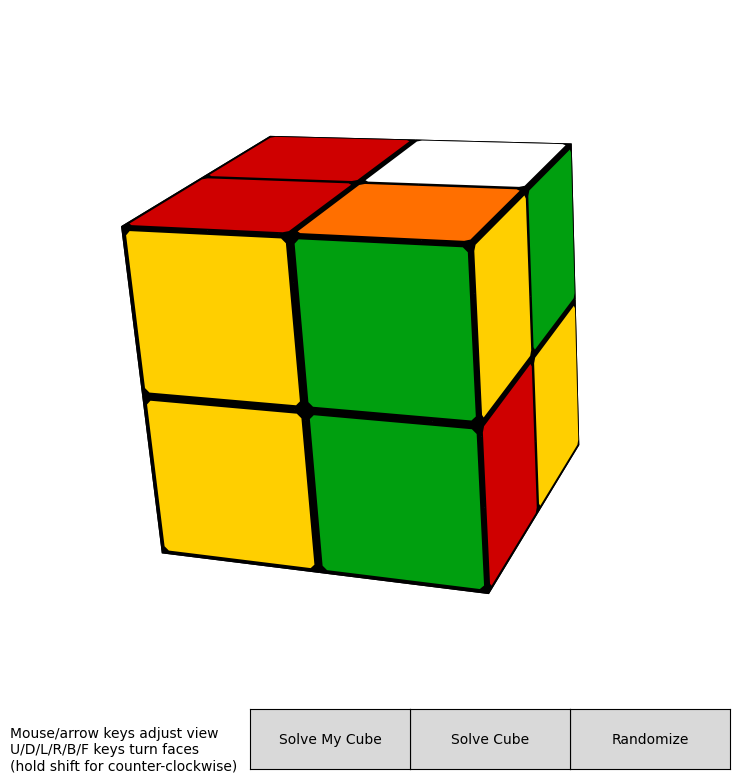

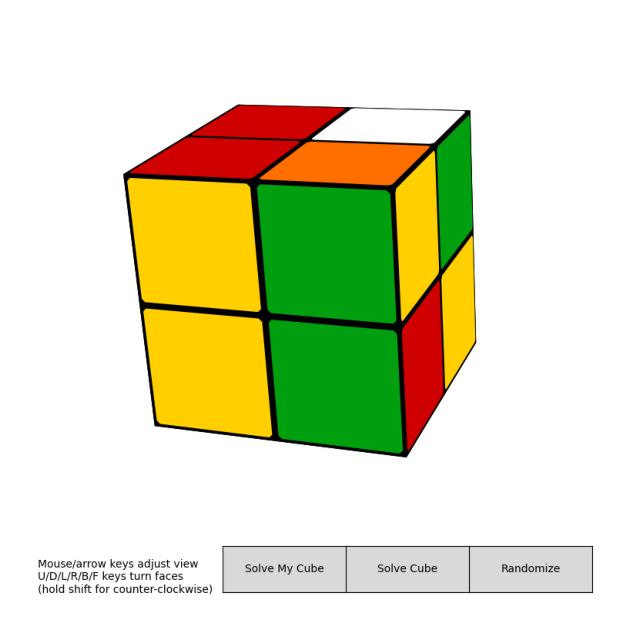

In [20]:
max_timesteps = 10
sample_scramble_count = 2
sample_cube_count = 2
seed = 0
video_path = './video/'
for scramble_count in range(1, sample_scramble_count+1):
    solve_count = 0
    for idx in range(sample_cube_count):
        state, done = e.reset(seed, scramble_count), False
        frames = []
        for timestep in range(1, max_timesteps+1):
            frames.append(e.render(mode='rgb_array'))
            with torch.no_grad():
                # action = model.get_action(state)
                action = np.random.randint(12)
            next_state, reward, done, info = e.step(action)
            # if done:
            #     solve_count += 1
            #     # video end
            #     e.close()
            #     save_frames_as_gif(frames, path = video_path, filename = f'cube_{scramble_count}_{sample_cube_count}.gif')
            #     break
            state = next_state
        save_frames_as_gif(frames, scramble_count, sample_cube_count, path = video_path)
#     solve_percentage = (solve_count/sample_cube_count) * 100
# print(solve_percentage)